In [29]:
from tensorflow.keras.layers import Input, Dense, SimpleRNN, GRU, LSTM, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# build the dataset
# This is a nonlinear AND long-distance dataset
# (Actually, we will test long-distance vs short-distance patterns)

# start with a small T and increase it later
T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
    # x = sequence
    if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
        return 1
    if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
        return 1
    return 0

for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
    y = get_label(x, -1, -2, -3) # short distance
    # y = get_label(x, 0, 1, 2) # long distance
    Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (5000, 10) Y.shape (5000,)


In [3]:
# Try a linear model first - note: it is classification now!
i = Input(shape=(T,))
x = Dense(1, activation="sigmoid")(i)
model = Model(i, x)
model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

# train the network
r = model.fit(X, Y, epochs=100, validation_split=0.5)

Epoch 1/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4895 - loss: 0.8199 - val_accuracy: 0.5008 - val_loss: 0.7048
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5023 - loss: 0.6994 - val_accuracy: 0.4960 - val_loss: 0.6960
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5287 - loss: 0.6927 - val_accuracy: 0.4900 - val_loss: 0.6971
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5024 - loss: 0.6938 - val_accuracy: 0.4924 - val_loss: 0.6965
Epoch 5/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5280 - loss: 0.6909 - val_accuracy: 0.4884 - val_loss: 0.6960
Epoch 6/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5168 - loss: 0.6932 - val_accuracy: 0.4952 - val_loss: 0.6950
Epoch 7/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5020 - loss: 0.6948 - val_accuracy: 0.4964 - val_loss: 0.6968
Epoch 8/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5228 - loss: 0.6959 - val_accuracy: 0.4948 - v

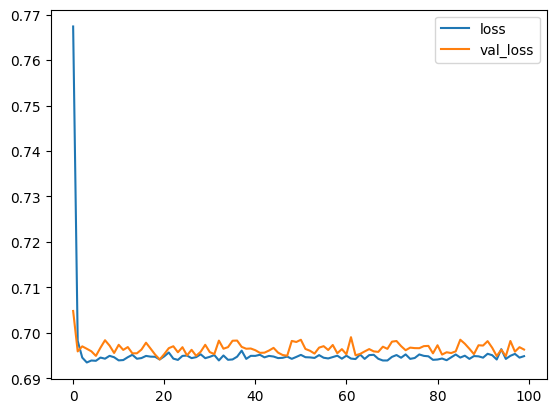

In [4]:
# plot the loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

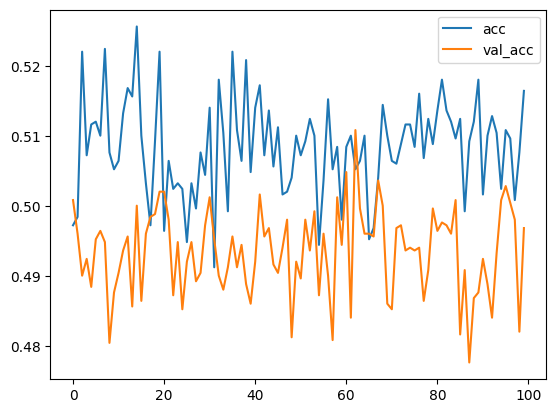

In [5]:
# plot the accuracy too - should be around 50%
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [7]:
np.expand_dims(X, -1).shape

(5000, 10, 1)

In [9]:
# Now try a simple RNN
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
# x = LSTM(5)(i)
x = SimpleRNN(5)(i)
# x = GRU(5)(i)

# method 2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPool1D()(x)

x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.01),
              metrics=["accuracy"])

In [10]:
# train the RNN
r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5
)

Epoch 1/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4813 - loss: 0.7023 - val_accuracy: 0.5196 - val_loss: 0.6930
Epoch 2/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5474 - loss: 0.6912 - val_accuracy: 0.5844 - val_loss: 0.6843
Epoch 3/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6237 - loss: 0.6757 - val_accuracy: 0.7272 - val_loss: 0.6329
Epoch 4/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7525 - loss: 0.6063 - val_accuracy: 0.8256 - val_loss: 0.5022
Epoch 5/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8308 - loss: 0.4707 - val_accuracy: 0.8716 - val_loss: 0.3832
Epoch 6/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8859 - loss: 0.3572 - val_accuracy: 0.8988 - val_loss: 0.3118
Epoch 7/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9119 - loss: 0.2937 - val_accuracy: 0.9236 - val_loss: 0.2617
Epoch 8/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9422 - loss: 0.2452 - val_accuracy: 0.9372 - v

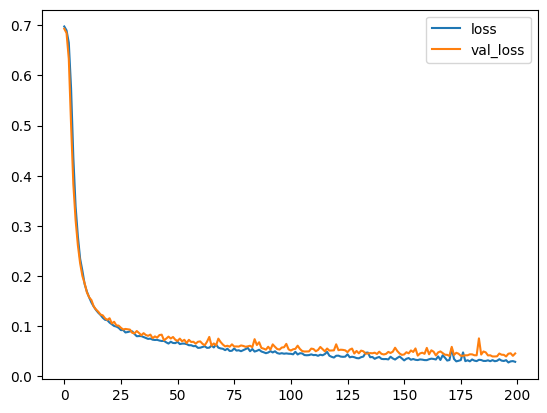

In [11]:
# plot the loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

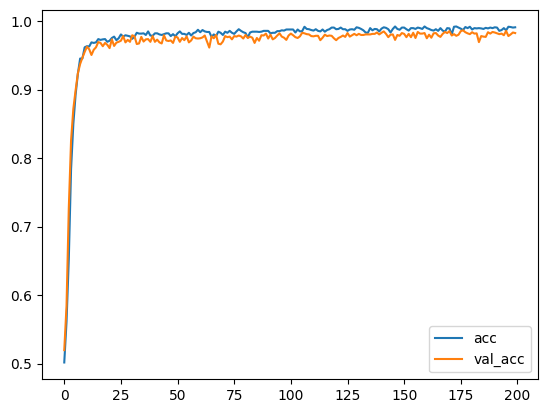

In [12]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [13]:
# Now change to the long distance problem

# Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []

for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
    y = get_label(x, 0, 1, 2) # long distance
    Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (5000, 10) Y.shape (5000,)


In [14]:
# Now test our simple RNN again
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.01),
              metrics=["accuracy"])

In [15]:
# train the RNN
r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5
)

Epoch 1/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4927 - loss: 0.7220 - val_accuracy: 0.5072 - val_loss: 0.6963
Epoch 2/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5333 - loss: 0.6939 - val_accuracy: 0.5156 - val_loss: 0.6936
Epoch 3/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5377 - loss: 0.6905 - val_accuracy: 0.5352 - val_loss: 0.6907
Epoch 4/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5517 - loss: 0.6906 - val_accuracy: 0.5112 - val_loss: 0.6967
Epoch 5/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5379 - loss: 0.6920 - val_accuracy: 0.4968 - val_loss: 0.6953
Epoch 6/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5031 - loss: 0.6945 - val_accuracy: 0.5072 - val_loss: 0.6940
Epoch 7/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5059 - loss: 0.6935 - val_accuracy: 0.5220 - val_loss: 0.6927
Epoch 8/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5036 - loss: 0.6923 - val_accuracy: 0.5108 - v

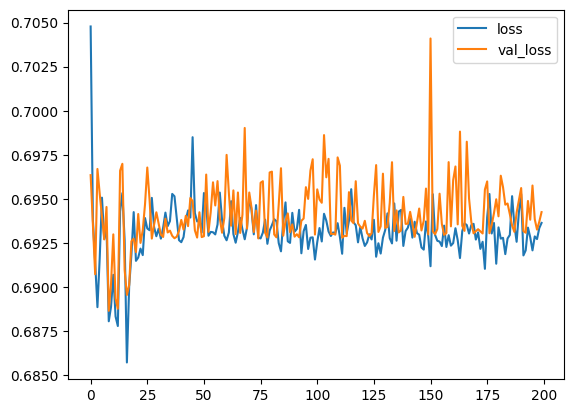

In [16]:
# plot the loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

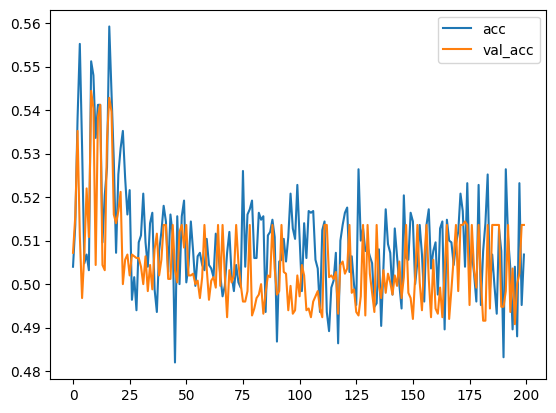

In [17]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [18]:
# Now tes our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.01),
              metrics=["accuracy"])

# train the RNN
r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5
)

Epoch 1/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5103 - loss: 0.6952 - val_accuracy: 0.4992 - val_loss: 0.6927
Epoch 2/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4960 - loss: 0.6930 - val_accuracy: 0.5028 - val_loss: 0.6931
Epoch 3/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5086 - loss: 0.6933 - val_accuracy: 0.4936 - val_loss: 0.6942
Epoch 4/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5106 - loss: 0.6932 - val_accuracy: 0.5080 - val_loss: 0.6928
Epoch 5/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5175 - loss: 0.6925 - val_accuracy: 0.5016 - val_loss: 0.6929
Epoch 6/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5143 - loss: 0.6923 - val_accuracy: 0.5016 - val_loss: 0.6928
Epoch 7/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5231 - loss: 0.6912 - val_accuracy: 0.5008 - val_loss: 0.6930
Epoch 8/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5241 - loss: 0.6918 - val_accuracy: 0.4980 -

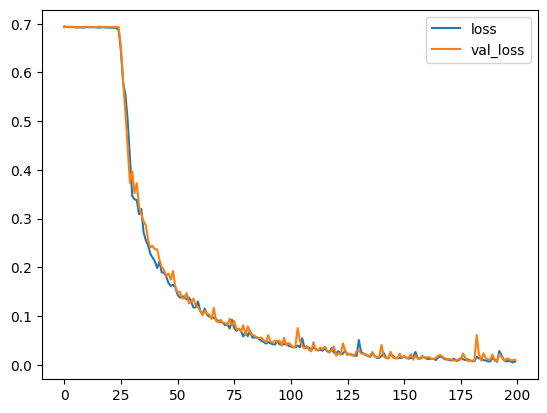

In [19]:
# plot the loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

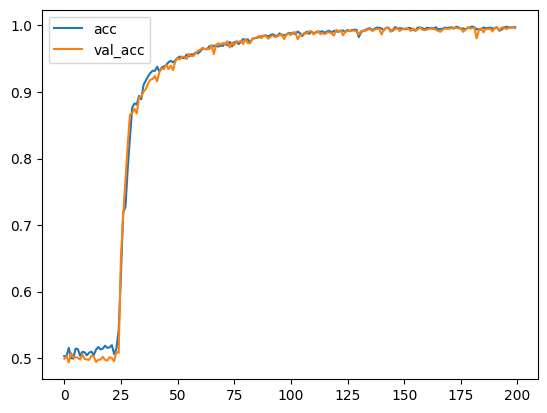

In [20]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [21]:
# Make the problem harder by making T larger

T = 20
D = 1
X = []
Y = []

for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
    y = get_label(x, 0, 1, 2) # long distance
    Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (5000, 20) Y.shape (5000,)


In [22]:
# Now test our Simple RNN again

inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.01),
              metrics=["accuracy"])

# train the RNN
r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5
)

Epoch 1/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4733 - loss: 0.7294 - val_accuracy: 0.4812 - val_loss: 0.6996
Epoch 2/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5110 - loss: 0.6942 - val_accuracy: 0.5088 - val_loss: 0.6958
Epoch 3/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5081 - loss: 0.6933 - val_accuracy: 0.5040 - val_loss: 0.6968
Epoch 4/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5022 - loss: 0.6951 - val_accuracy: 0.4972 - val_loss: 0.6949
Epoch 5/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5028 - loss: 0.6955 - val_accuracy: 0.4808 - val_loss: 0.6945
Epoch 6/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5067 - loss: 0.6955 - val_accuracy: 0.4968 - val_loss: 0.6952
Epoch 7/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5348 - loss: 0.6897 - val_accuracy: 0.5060 - val_loss: 0.6976
Epoch 8/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5225 - loss: 0.6929 - val_accuracy: 0.5056 

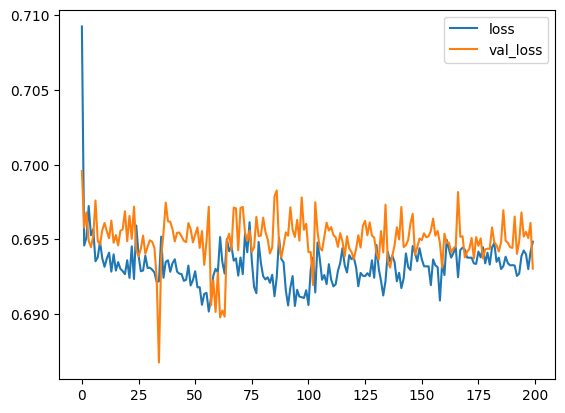

In [23]:
# plot the loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

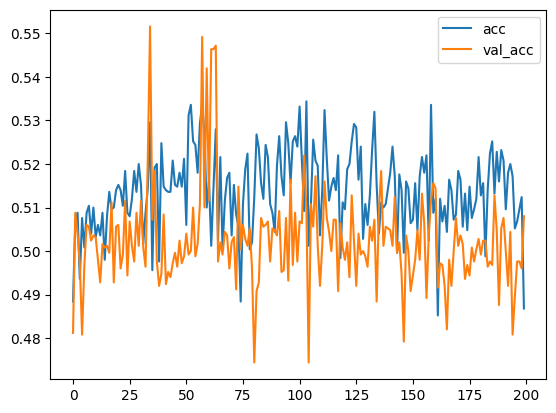

In [24]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [25]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.01),
              metrics=["accuracy"])

# train the RNN
r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5
)

Epoch 1/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.4903 - loss: 0.6949 - val_accuracy: 0.4980 - val_loss: 0.6984
Epoch 2/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5025 - loss: 0.6962 - val_accuracy: 0.5012 - val_loss: 0.6942
Epoch 3/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5223 - loss: 0.6926 - val_accuracy: 0.5032 - val_loss: 0.6939
Epoch 4/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5053 - loss: 0.6934 - val_accuracy: 0.5052 - val_loss: 0.6950
Epoch 5/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5052 - loss: 0.6926 - val_accuracy: 0.4980 - val_loss: 0.6947
Epoch 6/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5347 - loss: 0.6913 - val_accuracy: 0.4940 - val_loss: 0.6950
Epoch 7/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5164 - loss: 0.6930 - val_accuracy: 0.5024 - val_loss: 0.6953
Epoch 8/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5066 - loss: 0.6940 - val_accuracy: 0.5036 

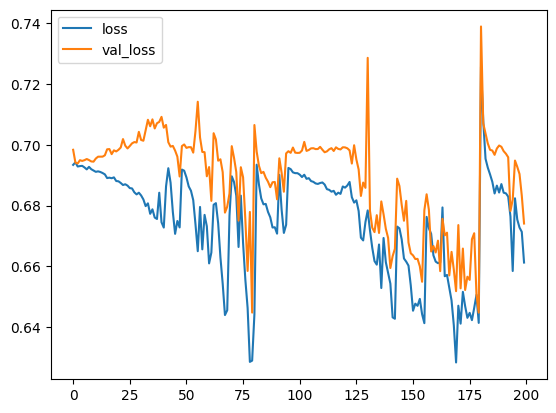

In [26]:
# plot the loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

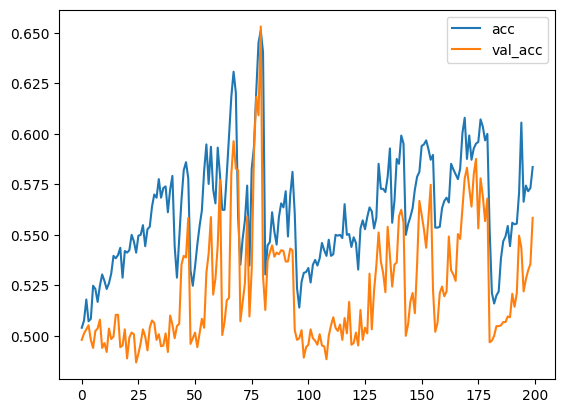

In [27]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [28]:
# Now test our GRU

inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = GRU(5)(i)

x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.01),
              metrics=["accuracy"])

# train the RNN
r = model.fit(
    inputs, Y,
    epochs=400,
    validation_split=0.5
)

Epoch 1/400
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.4950 - loss: 0.6990 - val_accuracy: 0.4976 - val_loss: 0.6952
Epoch 2/400
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5128 - loss: 0.6921 - val_accuracy: 0.4968 - val_loss: 0.6945
Epoch 3/400
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5011 - loss: 0.6937 - val_accuracy: 0.4984 - val_loss: 0.6951
Epoch 4/400
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4978 - loss: 0.6947 - val_accuracy: 0.4928 - val_loss: 0.6946
Epoch 5/400
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5184 - loss: 0.6924 - val_accuracy: 0.4908 - val_loss: 0.6963
Epoch 6/400
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4945 - loss: 0.6962 - val_accuracy: 0.4952 - val_loss: 0.6959
Epoch 7/400
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4893 - loss: 0.6967 - val_accuracy: 0.4932 - val_loss: 0.6956
Epoch 8/400
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5186 - loss: 0.6929 - val_accuracy: 0.

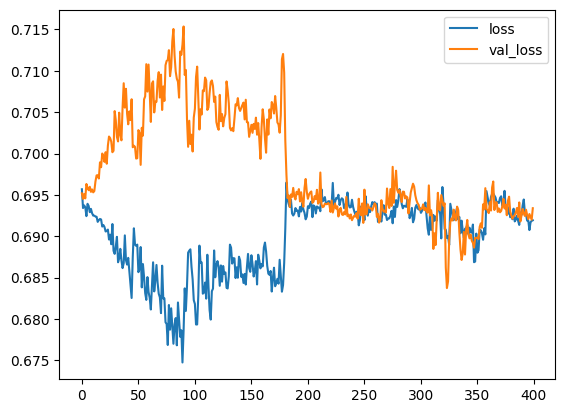

In [30]:
# plot the loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

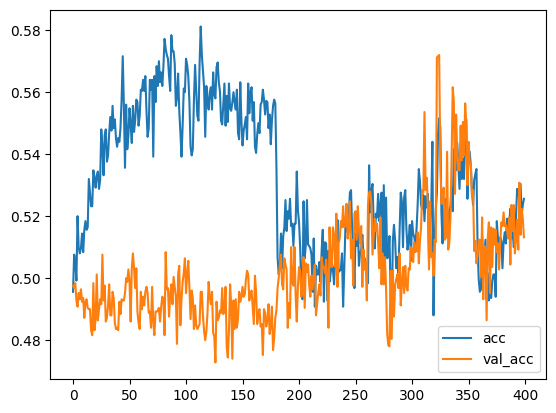

In [31]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [32]:
# Make the problem harder by making T larger

T = 30
D = 1
X = []
Y = []

for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
    y = get_label(x, 0, 1, 2) # long distance
    Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (5000, 30) Y.shape (5000,)


In [33]:
# Now test our LSTM

inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.01),
              metrics=["accuracy"])

# train the RNN
r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5
)

Epoch 1/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.4680 - loss: 0.6967 - val_accuracy: 0.4936 - val_loss: 0.6941
Epoch 2/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5254 - loss: 0.6924 - val_accuracy: 0.4952 - val_loss: 0.6936
Epoch 3/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5020 - loss: 0.6926 - val_accuracy: 0.4932 - val_loss: 0.6934
Epoch 4/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4944 - loss: 0.6933 - val_accuracy: 0.5136 - val_loss: 0.6932
Epoch 5/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5174 - loss: 0.6922 - val_accuracy: 0.5148 - val_loss: 0.6934
Epoch 6/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5151 - loss: 0.6929 - val_accuracy: 0.5044 - val_loss: 0.6933
Epoch 7/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5158 - loss: 0.6930 - val_accuracy: 0.5060 - val_loss: 0.6936
Epoch 8/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5217 - loss: 0.6926 - val_accuracy: 0.

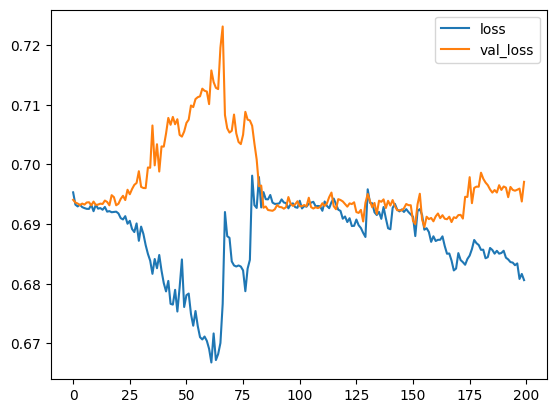

In [34]:
# plot the loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

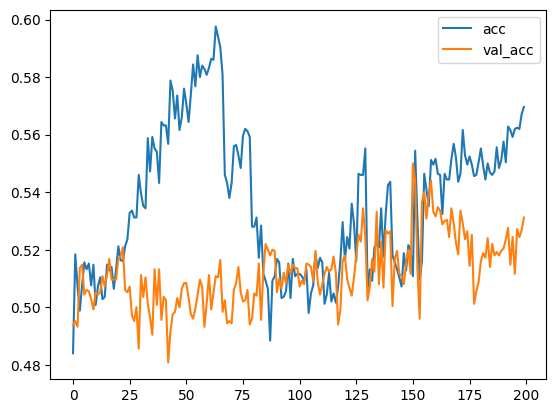

In [35]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [39]:
# Now try a LSTM with Global Max Pooling
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 2
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)

x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)
model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

# train the RNN
r = model.fit(
    inputs, Y,
    epochs=100,
    validation_split=0.5
)

Epoch 1/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.5259 - loss: 0.6940 - val_accuracy: 0.4892 - val_loss: 0.6937
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4995 - loss: 0.6942 - val_accuracy: 0.5148 - val_loss: 0.6932
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5041 - loss: 0.6937 - val_accuracy: 0.5152 - val_loss: 0.6928
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5262 - loss: 0.6915 - val_accuracy: 0.4844 - val_loss: 0.6932
Epoch 5/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5096 - loss: 0.6926 - val_accuracy: 0.4848 - val_loss: 0.6943
Epoch 6/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4966 - loss: 0.6936 - val_accuracy: 0.5196 - val_loss: 0.6923
Epoch 7/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5301 - loss: 0.6916 - val_accuracy: 0.5424 - val_loss: 0.6900
Epoch 8/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5258 - loss: 0.6908 - val_accuracy: 0.

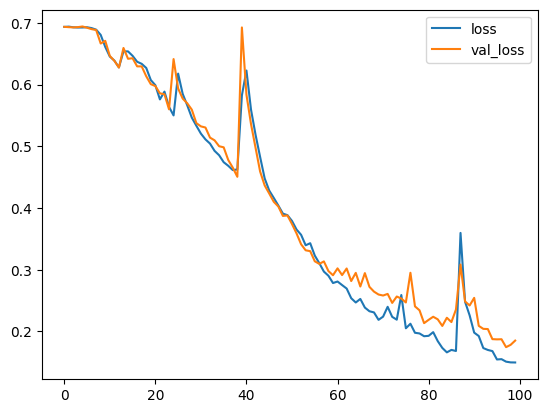

In [40]:
# plot the loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

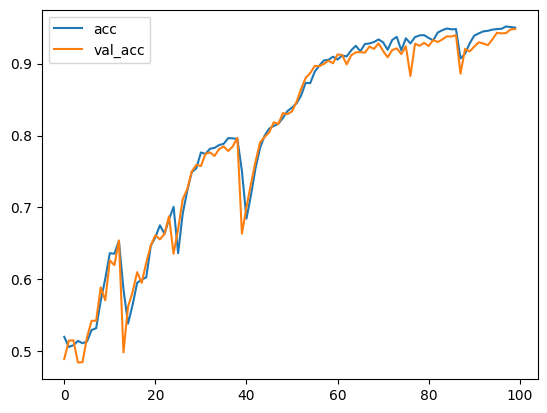

In [41]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()